# **House Price Regression**

##  Préparation du NoteBook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
pd.set_option('display.max_column',81)
pd.set_option('display.max_rows',81)

## Infos sur le dataset : 

**Dimensions** : (1460, 81)  
**Target** : *SalePrice*  

Pour la description de chaque colonne, se référer au document *data_description.txt*  

**Remarque sur les % de Nan les + vides**:  
- *PoolQC* : très vide mais NaN correspond à l'abscence de piscine
- *MiscFeature* : correspond aux arguments non présent dans les autre variable (vide à 96%)
- *Alley*: dans le cas où il y a une allée en pavé ou en gravier pour accéder à la propriété
- *Fence*: idem pour les clôtures (80%)
- *FireplaceQu* : qualité de la cheminée (47%) Na = pas de cheminée  
- *LotFrontage* : longueur de route connectée à la maison (Il faut chercher à quoi correspondent les Na)
- variables garage *5 à 5.5% (sans garage)
- variables avec bsmt : 2% sans sous-sols
- variables avec MasVnr : 0.5% sans finition fausse brique
- electrical : un seul manquant, remplacer par une valeur arbitraire par ex ? 

**Types de variables** :
- object :    43
- int64  :    35
- float64:     3 (LotFrontage	MasVnrArea	GarageYrBlt)

**Hypothèses** :
- beaucoup de variables font références à des critères précis mais ne représente qu'un très petit nombre de propriété (règle 80/20)


In [4]:
data.shape

(1460, 81)

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

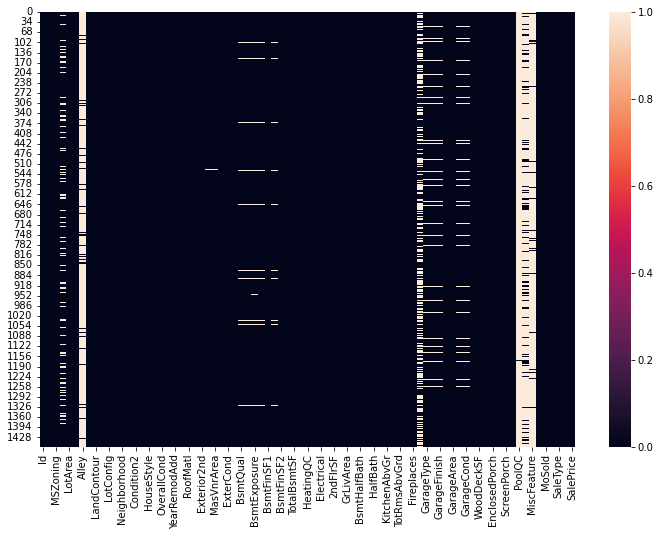

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isna())

<AxesSubplot:>

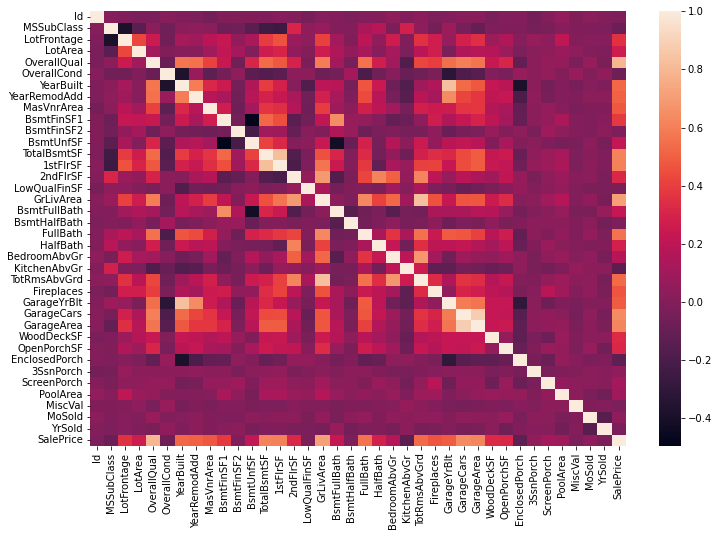

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

In [8]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageCond       0.055479
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtQual         0.025342
BsmtCond         0.025342
BsmtFinType1     0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
GrLivArea        0.000000
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea    

In [9]:
missing_rate = data.isna().sum()/data.shape[0]

In [10]:
var_garage = data.columns[(missing_rate < 0.06) & (missing_rate > 0.05)]

In [11]:
elec_missing = data[data['Electrical'].isna()]

## Etude de la Target

La target possède une distribution normale, centrée sur 150 000 \$ environ 

In [12]:
(data.corr()['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [13]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [14]:
object_col = data.select_dtypes("object").columns

In [15]:
float_col = data.select_dtypes("float").columns

In [16]:
int_col = data.select_dtypes("int").columns

In [17]:
data.select_dtypes('float')

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


C:\Users\valen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

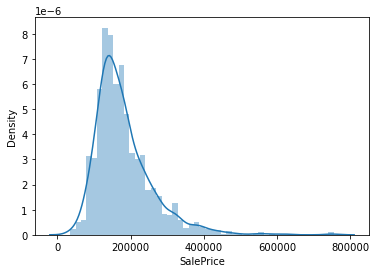

In [18]:
sns.distplot(data['SalePrice'])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

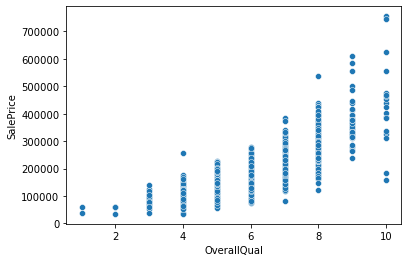

In [19]:
sns.scatterplot( x = 'OverallQual' , y = 'SalePrice', data = data )

### Etude du test_set 

**Taille** : (1459, 80)  
**Etude Nan** : on remarque qu'il y a plus de colonne avec des données manquantes, il faudra les combler également ! 


In [20]:
df_test = pd.read_csv('test.csv')

In [21]:
df_test.shape

(1459, 80)

In [22]:
(df_test.isna().sum()/df_test.shape[0] > 0.0001).sum()

33

In [23]:
(data.isna().sum()/data.shape[0] > 0.0001).sum()

19

## Model

Tout d'abord séparer le Trainset en train et testset.  
Puis faire une fonction d'encodage !  
Ensuite, combler les datas manquantes.  

Pour la sélection des variables, peut être utiliser un algos de ML pour retourner les 10 variables les plus utiles ?   
Coupler cet algo avec un model de ML ? 

### Création des copies, train et test set 

In [24]:
df = pd.read_csv('train.csv')

In [25]:
from sklearn.model_selection import train_test_split 

In [26]:
trainset,testset = train_test_split(df, test_size = 0.2, random_state=0)

### Etude du trainset et du testset

In [27]:
trainset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
618,619,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,452.0,Ex,TA,PConc,Ex,TA,Av,GLQ,48,Unf,0,1774,1822,GasA,Ex,Y,SBrkr,1828,0,0,1828,0,0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,2007.0,Unf,3,774,TA,TA,Y,0,108,0,0,260,0,NaN,NaN,NaN,0,7,2007,New,Partial,314813
870,871,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,Gd,N,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1962.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,109500
92,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1921,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,Gd,TA,No,ALQ,713,Unf,0,163,876,GasA,Ex,Y,SBrkr,964,0,0,964,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1921.0,Unf,2,432,TA,TA,Y,0,0,44,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
817,818,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,CemntBd,CmentBd,BrkFace,148.0,Gd,TA,PConc,Gd,TA,No,GLQ,1218,Unf,0,350,1568,GasA,Ex,Y,SBrkr,1689,0,0,1689,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Attchd,2002.0,RFn,3,857,TA,TA,Y,150,59,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,271000
302,303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,150.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1541,1541,GasA,Ex,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,3,843,TA,TA,Y,468,81,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,205000


In [28]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,956.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1110.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,738.685788,56.605308,69.614017,10589.672945,6.086473,5.572774,1970.890411,1984.692637,103.481067,439.890411,45.571918,568.049658,1053.511986,1160.958904,351.479452,6.444349,1518.882705,0.422089,0.054795,1.566781,0.384418,2.882705,1.044521,6.544521,0.612158,1978.140541,1.771404,473.632705,94.498288,48.044521,23.022260,3.218322,14.528253,2.118151,50.936644,6.301370,2007.819349,180808.898973
std,421.609683,42.172322,22.946069,10704.180793,1.367472,1.116908,30.407486,20.684612,182.676225,435.106803,156.229962,437.569919,412.073393,373.315037,438.137938,51.200836,513.800708,0.514494,0.231409,0.546698,0.497118,0.802166,0.218441,1.624493,0.640872,24.877265,0.730041,209.442320,127.312017,68.619199,63.153093,27.916593,54.009608,36.482294,550.380636,2.725977,1.335971,78499.911304
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,373.750000,20.000000,59.000000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,0.000000,228.000000,798.750000,884.000000,0.000000,0.000000,1139.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,749.500000,50.000000,69.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.500000,0.000000,482.500000,992.000000,1092.000000,0.000000,0.000000,1471.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,477.500000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1108.750000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,167.750000,716.000000,0.000000,811.250000,1276.250000,1389.250000,729.000000,0.000000,1788.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1120.000000,2153.000000,3206.000000,3228.000000,1872.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
testset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,292.000000,292.000000,245.000000,292.000000,292.000000,292.000000,292.000000,292.000000,290.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,269.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,697.756849,58.065068,71.751020,10225.448630,6.150685,5.585616,1972.777397,1985.558219,104.503448,458.636986,50.458904,564.003425,1073.099315,1169.297945,329.044521,3.445205,1501.787671,0.438356,0.068493,1.558219,0.376712,2.801370,1.054795,6.410959,0.616438,1980.014870,1.750000,470.369863,93.229452,41.123288,17.681507,4.174658,17.191781,5.321918,13.698630,6.404110,2007.801370,181370.383562
std,420.740060,42.862834,28.913368,6316.011655,1.444708,1.098045,29.372857,20.508485,174.771037,532.429559,180.486156,459.411647,532.616998,436.297674,430.304825,36.512584,570.546175,0.536920,0.266259,0.568383,0.526160,0.866481,0.227969,1.627391,0.660732,23.886231,0.813862,230.793820,117.316760,55.572236,52.075262,34.398119,62.315825,52.416379,134.767274,2.615257,1.298267,83244.107342
min,2.000000,20.000000,21.000000,1477.000000,3.000000,3.000000,1882.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.000000,0.000000,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,67000.000000
25%,333.250000,20.000000,60.000000,7444.000000,5.000000,5.000000,1954.750000,1968.750000,0.000000,0.000000,0.000000,211.000000,782.250000,864.000000,0.000000,0.000000,1113.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,308.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128875.000000
50%,660.000000,50.000000,70.000000,9246.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,395.500000,0.000000,465.000000,990.000000,1072.500000,0.000000,0.000000,1427.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,36.500000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163950.000000
75%,1061.250000,76.250000,80.000000,11544.750000,7.000000,6.000000,2001.000000,2004.000000,160.750000,699.250000,0.000000,784.250000,1350.500000,1394.500000,716.250000,0.000000,1742.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,66.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,203573.750000
max,1453.000000,190.000000,313.000000,63887.000000,10.000000,9.000000,2009.000000,2009.000000,1031.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,479.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,2.000000,12.000000,3.000000,2009.000000,4.000000,1418.000000,857.000000,292.000000,252.000000,407.000000,440.000000,555.000000,2000.000000,12.000000,2010.000000,745000.000000


### Gestion des NaN

Lorsque NaN a un sens, on crée une valeur différente de celles exitentent et on les remplaces  
Pour le reste plusieurs choix s'offre à nous : 
- supprimer les NaN restant mais on aura un pblm lors de l'évaluation du testset
- les remplacer par une valeur arbitraire (extremum, moyenne)
- utiliser un algo type KNN (ne fonctionne pas pour les var type object ?) Cf discussion avec Chat GPT : utiliser un algo de regression linéaire ou autre pour avoir la donnée manquante. Attention à enlever la target pour ce modèle ainsi que toutes les colonnes avec un troue + encodage + normalisation (idée un peu complexe ici)

Ici on choisira de les remplacer par la moyenne ou pour les types objects, la valeur la plus récurente

Pour les variables *float* NaN signifie une abscence du feature, on remplace donc par 0

In [30]:
def imputation(df):
    
    int_col = df.select_dtypes("int").columns
    float_col = df.select_dtypes("float").columns
    object_col = df.select_dtypes("object").columns
    
    #colonne type float : Nan ==> 0
    df[float_col] = df[float_col].fillna(0)
        
    #les colonnes de type int idem
    df[int_col] = df[int_col].fillna(0)
    
    #colonne de type object : Nan ==> 0 (nouvelle variable pour marquer l'absence)
    df[object_col] = df[object_col].fillna('0')
    
    return df

In [31]:
trainset = imputation(trainset)

C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Encodage

On souhaie utiliser *OrdinalEncoder* (pas besoin d'entrer à la main les colonnes)  
Cependant, il faut que les colonnes ne contiennent pas de *NaN* ou de valeur infini et qu'elles contiennent des valeurs du même type !

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
def encodage(df):
    oe = OrdinalEncoder()
    df[object_col] = oe.fit_transform(df[object_col])
    return df

In [34]:
trainset = encodage(trainset)

C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Normalisation

Ici, on va commencer à utiliser d'autre modèle qui nécessite la normalisation

In [35]:
from sklearn.preprocessing import RobustScaler

In [36]:
def scaler(df):
    scaler = RobustScaler()
    scaler.fit(df)
    return scaler

In [37]:
def normalisation(df,scaler):
    return pd.DataFrame(scaler.transform(df), columns=df.columns)

### Fonction preprocessing

In [38]:
def preprocessing(df): 
    df = imputation(df)
    df = encodage(df)
    return df

### Feature Selection

Essayons d'enlever les variables les moins utiles pour n'en retenir que 10 à la fin avec *SelectKBest* ! 

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [130]:
selector = SelectKBest(k=10, score_func=f_regression)

In [41]:
def separation(df):
    X = df.drop('SalePrice',axis=1)
    y = df['SalePrice']
    return X,y

In [42]:
def feature_selection(df):
    X, y= separation(df)
    X_selected = selector.fit_transform(X, y)
    indices_selected = selector.get_support(indices=True)
    return X.columns[indices_selected]

### Model 

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [44]:
DecisionTreeClassifier_ = DecisionTreeClassifier(random_state = 0 )

In [45]:
RandomForestClassifier_ = RandomForestClassifier(random_state = 0 )

In [46]:
LinearRegression_ = LinearRegression()

In [47]:
KNeighborsRegressor_ = KNeighborsRegressor(n_neighbors=5)

In [48]:
SVR_ = SVR(kernel='rbf')

In [49]:
pipeline = make_pipeline(SelectKBest(k=5),DecisionTreeClassifier(random_state = 0 ))

### Procédure d'évaluation

Comme nous avons une target continue, on utilise une évaluation basée sur le coeff r2 qui prends en compte les variations du dataset.

In [50]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [51]:
def eval_model(trainset,testset,model):

    #preprocessing
    #trainset = preprocessing(trainset)
    #testset = preprocessing(testset)
    
    #séparation
    X_train, y_train = separation(trainset)
    X_test, y_test = separation(testset)
    
    #feature selection
    columns_selected = feature_selection(trainset)
    
    #maj des X_train et X_test :
    X_train = X_train[columns_selected]
    X_test = X_test[columns_selected]
    
    #entrainement du modèle
    model.fit(X_train,y_train)
    
    #prédiction
    y_pred = model.predict(X_test)
    
    #rapport :
    #print(classification_report(y_test,y_pred))
    
    #learning curve : 
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=2, scoring='r2', train_sizes = np.linspace(0.1,1,10))

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1))
    plt.plot(N, val_score.mean(axis=1))
    
    #histogramme des variables : 
    #pd.DataFrame(model.feature_importances_ , index = X_train.columns).plot.bar()
    
    #graphe des prédictions vs réalité 
    plt.figure()
    plt.plot(sorted(y_test.values),c='r')
    plt.plot(sorted(y_pred), '--')
    plt.show()
    print('Score R² : ' + str(val_score.mean(axis=1)[-1]))
    return columns_selected


### Test des différents modèles

LinearRegression_ à les meilleurs performances avec un R² de 0.8 pour un nombre de paramètre de 8 !

In [52]:
trainset = preprocessing(trainset)
testset = preprocessing(testset)
scaler_ = scaler(trainset)
trainset = normalisation(trainset,scaler_)
testset = normalisation(testset,scaler_)

C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [53]:
dico_model = {'LinearRegression_' : LinearRegression_,
              'KNeighborsRegressor_' : KNeighborsRegressor_,
              'SVR_' : SVR_}

In [54]:
for key , model in dico_model.items() :
    print(model)
    eval_model(trainset,testset,model)

### Analyse de l'importance des variables :

Ici, on va utiliser des aglo simple comme un arbre de décision ou un random forest et tracer l'histogramme de l'importance des variables (on fera attention à prendre des algos qui ne sont pas sensible à la normalisation car elle n'a pas encore été faite

In [55]:
#y_pred, y_test =eval_model(trainset,testset,DecisionTreeClassifier_)

In [56]:
#y_pred, y_test =eval_model(trainset,testset,RandomForestClassifier_)

### Amélioration des paramètres : 

Ici on va utiliser un GridSearchCV pour trouver les meilleurs paramètres.  
On pourra ajouter un polynomial feature ou bien tester d'autre modèle avant pour améliorer les perfs

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
hyperpara = {'selectkbest__k' : [1,3,5,7,10]}

In [59]:
grid = GridSearchCV(pipeline, hyperpara, scoring=f_regression)

In [60]:
grid.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('selectkbest', SelectKBest(k=5)),
  ('decisiontreeclassifier', DecisionTreeClassifier(random_state=0))],
 'estimator__verbose': False,
 'estimator__selectkbest': SelectKBest(k=5),
 'estimator__decisiontreeclassifier': DecisionTreeClassifier(random_state=0),
 'estimator__selectkbest__k': 5,
 'estimator__selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'estimator__decisiontreeclassifier__ccp_alpha': 0.0,
 'estimator__decisiontreeclassifier__class_weight': None,
 'estimator__decisiontreeclassifier__criterion': 'gini',
 'estimator__decisiontreeclassifier__max_depth': None,
 'estimator__decisiontreeclassifier__max_features': None,
 'estimator__decisiontreeclassifier__max_leaf_nodes': None,
 'estimator__decisiontreeclassifier__min_impurity_decrease': 0.0,
 'estimator__decisiontreeclassifier__min_impurity_split': None,
 'estimator__decisiontreeclassifier__

In [127]:
def eval_dico(trainset,testset,dico):
    
    #création des scalers :
    scaler_sans_target,scaler_target = creation_scaler(trainset)
    
    #récupération des colonnes :
    columns_selected = feature_selection(trainset)
    
    #preprocessing
    trainset = preprocessing(trainset)
    testset = preprocessing(testset)
    
    #séparation
    X_train, y_train = separation(trainset)
    X_test, y_test = separation(testset)
    
    #normalisation
    X_train_norm = normalisation(X_train,scaler_sans_target)
    X_test_norm = normalisation(X_test,scaler_sans_target)
    
    y_train_norm = scaler_target.transform(y_train.values.reshape(-1,1))
    
    #feature selection
    X_train_norm = X_train_norm[columns_selected]
    X_test_norm = X_test_norm[columns_selected]
    
    #evaluation : 
    for key , model in dico.items() :
        print(model)
        #entrainement du modèle
        model.fit(X_train_norm,y_train_norm)
    
        #prédiction
        y_pred = model.predict(X_test_norm)
    
        #dénormalisation
        y_pred = scaler_target.inverse_transform(y_pred.reshape(-1, 1))
        y_pred = y_pred.reshape(1,-1)
    
        #learning curve : 
        N, train_score, val_score = learning_curve(model, X_train_norm, y_train_norm, cv=2, scoring='r2', train_sizes = np.linspace(0.1,1,10))

        plt.figure(figsize=(12,8))
        plt.plot(N, train_score.mean(axis=1))
        plt.plot(N, val_score.mean(axis=1))
        plt.title(str(model))
    
        #graphe des prédictions vs réalité 
        plt.figure()
        plt.plot(sorted(y_test.values),c='r', label = 'y_test')
        plt.plot(sorted(y_pred[0]), '--', label = 'y_pred')
        plt.legend()
        plt.title(str(model))
        plt.show()
        
        print(' Score R² : ' + str(val_score.mean(axis=1)[-1]))

In [131]:
eval_dico(trainset , testset , dico_model)

C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

LinearRegression()
 Score R² : 0.8039382603282751
KNeighborsRegressor()
 Score R² : 0.7881366294892737
SVR()


C:\Users\valen\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\valen\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\valen\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\valen\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

 Score R² : 0.7918045541130527


In [108]:
def eval_grid(trainset,testset,grid):
    
    #création des scalers :
    scaler_sans_target,scaler_target = creation_scaler(trainset)
    
    #récupération des colonnes :
    columns_selected = feature_selection(trainset)
    
    #preprocessing
    trainset = preprocessing(trainset)
    testset = preprocessing(testset)
    
    #séparation
    X_train, y_train = separation(trainset)
    X_test, y_test = separation(testset)
    
    #normalisation
    X_train_norm = normalisation(X_train,scaler_sans_target)
    X_test_norm = normalisation(X_test,scaler_sans_target)
    
    y_train_norm = scaler_target.transform(y_train.values.reshape(-1,1))
    
    #feature selection
    X_train_norm = X_train_norm[columns_selected]
    X_test_norm = X_test_norm[columns_selected]
    

    SVR_.fit(X_train_norm,y_train_norm)
    grid.fit(X_train_norm,y_train_norm)
    print(grid.best_params_)
    
    model = grid.best_estimator_
    
    #entrainement du modèle
    model.fit(X_train_norm,y_train_norm)
    
    #prédiction
    y_pred = model.predict(X_test_norm)
    
    #dénormalisation
    y_pred = scaler_target.inverse_transform(y_pred.reshape(-1, 1))
    y_pred = y_pred.reshape(1,-1)
    
    #learning curve : 
    N, train_score, val_score = learning_curve(model, X_train_norm, y_train_norm, cv=2, scoring='r2', train_sizes = np.linspace(0.1,1,10))

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1))
    plt.plot(N, val_score.mean(axis=1))
    
    #histogramme des variables : 
    #print(X_train.columns.shape)
    #print(model.named_steps['decisiontreeclassifier'].feature_importances_)
    #pd.DataFrame(model.named_steps['decisiontreeclassifier'].feature_importances_ , index = X_train.columns).plot.bar()
    
    #graphe des prédictions vs réalité 
    plt.figure()
    plt.plot(sorted(y_test.values),c='r', label = 'y_test')
    plt.plot(sorted(y_pred), '--', label = 'y_pred')
    plt.legend()
    plt.show()

### Réponse au problème :

La prochaine fois, on créera un scaler pour toutes les colonnes sauf la target et un pour la target puis on fera de la normalisation sur des sousdf / serie au lieu de tout le df d'un coup

In [64]:
df_test = pd.read_csv('test.csv')

In [65]:
trainset,testset = train_test_split(df, test_size = 0.2, random_state=0)

In [66]:
def creation_scaler(trainset):
    trainset = preprocessing(trainset)
    trainset_sans_target = trainset.drop('SalePrice',axis=1)
    target = trainset.SalePrice
    scaler_sans_target = scaler(trainset_sans_target)
    scaler_target = scaler(target.values.reshape(-1, 1))
    return scaler_sans_target , scaler_target

In [67]:
def rendu(df,trainset,model):
    
    #création des scalers :
    scaler_sans_target,scaler_target = creation_scaler(trainset)
    
    #récupération des colonnes :
    columns_selected = feature_selection(trainset)
    
    #preprocessing
    df = preprocessing(df)
    
    #normalisation
    df_normalised = normalisation(df,scaler_sans_target)

    #feature selection
    df_normalised = df_normalised[columns_selected]

    #predictions
    predictions = model.predict(df_normalised)

    #dénormalisation des predictions :
    predictions = scaler_target.inverse_transform(predictions.reshape(-1, 1))
    predictions = predictions.reshape(1,-1)
    
    #création du df de rendu :
    output = pd.DataFrame({'Id' : df.Id, 'SalePrice': predictions[0]})
    
    #création du fichier de rendu :
    output.to_csv('submission.csv', index=False)    

In [68]:
rendu(df_test,trainset,LinearRegression_)

C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\valen\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
